In [1]:
from evaluation import df_experiment, plot_df
import evaluation
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from colour_dict import colour_dict, simple_colour_dict
sns.set_style('darkgrid')
sns.set_context("paper")
%matplotlib inline

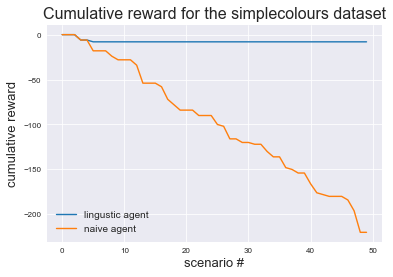

In [2]:
df = df_experiment('simplecolours',file_modifiers='_default1')
plot_df(df, 'simplecolours', file_modifiers='_default1')

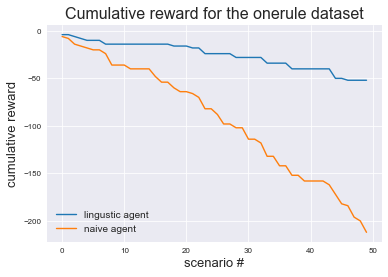

In [3]:
df = df_experiment('onerule', file_modifiers='_default1')
plot_df(df, 'onerule', file_modifiers='_default1')

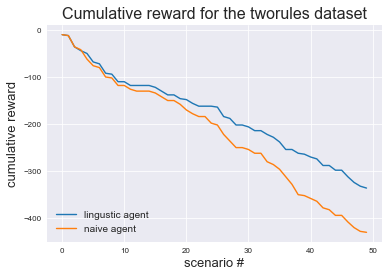

In [4]:
df = df_experiment('tworules', file_modifiers='_default1')
plot_df(df, 'tworules', file_modifiers='_train_default1')

In [5]:
# df = df_experiment('tworules', file_modifiers='_default')
# plot_df(df, 'tworules', file_modifiers='_default')

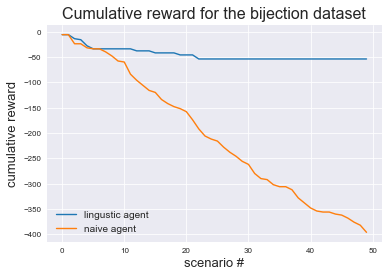

In [5]:
df = df_experiment('bijection', file_modifiers='_default1')
plot_df(df, 'bijection', file_modifiers='_default1')

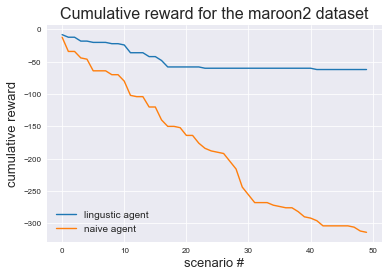

In [6]:
df = df_experiment('maroon2', file_modifiers='_default1')
plot_df(df, 'maroon2', file_modifiers='_default1')

red {'tp': 5, 'fp': 0, 'fn': 0, 'tn': 37}
blue {'tp': 8, 'fp': 2, 'fn': 1, 'tn': 31}


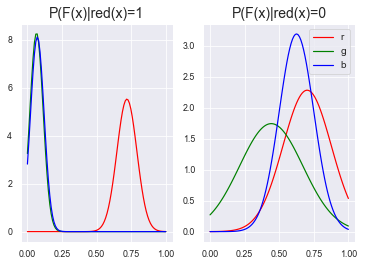

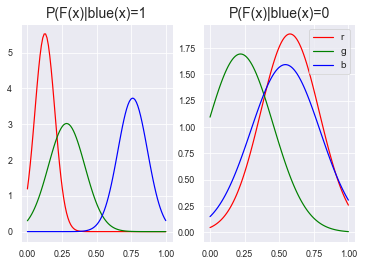

In [21]:
evaluation.plot_colours('onerule', file_modifiers='_default1', colour_thresh=0.01)

red {'tp': 1, 'fp': 0, 'fn': 0, 'tn': 6}
blue {'tp': 1, 'fp': 0, 'fn': 0, 'tn': 6}


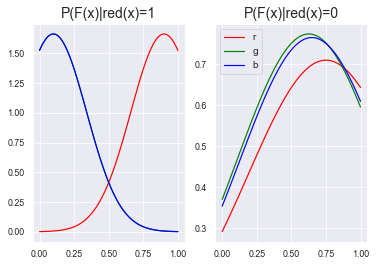

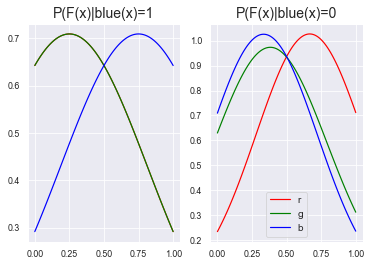

In [15]:
evaluation.plot_colours('simplecolours', colour_dict=simple_colour_dict, file_modifiers='_default1', colour_thresh=0.7)

green {'tp': 5, 'fp': 0, 'fn': 5, 'tn': 32}
yellow {'tp': 3, 'fp': 1, 'fn': 0, 'tn': 38}
red {'tp': 0, 'fp': 0, 'fn': 5, 'tn': 37}
blue {'tp': 9, 'fp': 9, 'fn': 0, 'tn': 24}


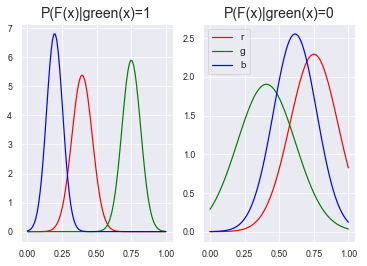

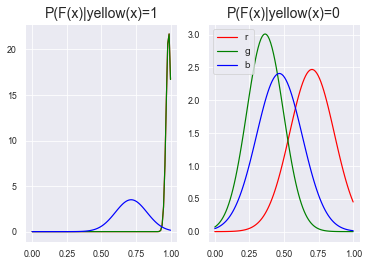

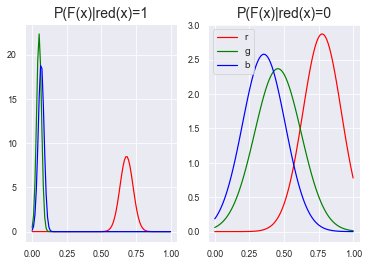

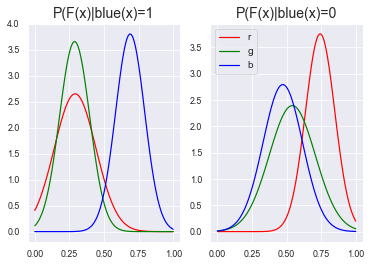

In [30]:
evaluation.plot_colours('tworules', file_modifiers='_default1')

red {'tp': 3, 'fp': 0, 'fn': 2, 'tn': 37}
blue {'tp': 4, 'fp': 0, 'fn': 5, 'tn': 33}
green {'tp': 8, 'fp': 0, 'fn': 2, 'tn': 32}
maroon {'tp': 0, 'fp': 3, 'fn': 0, 'tn': 39}


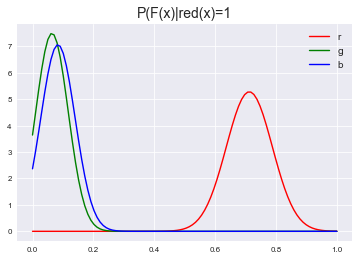

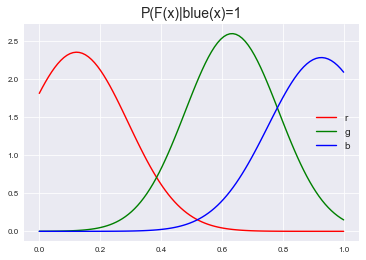

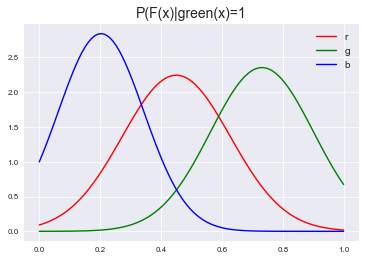

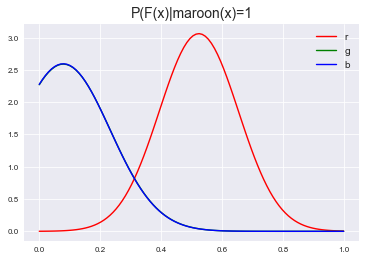

In [4]:
evaluation.plot_colours('maroon2', file_modifiers='_default1', colour_thresh=0.5)

red {'tp': 5, 'fp': 0, 'fn': 0, 'tn': 37}
blue {'tp': 9, 'fp': 1, 'fn': 0, 'tn': 32}


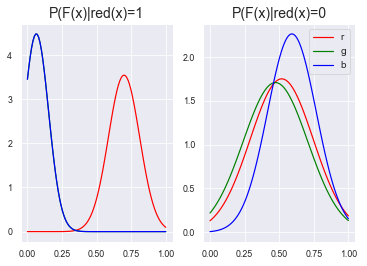

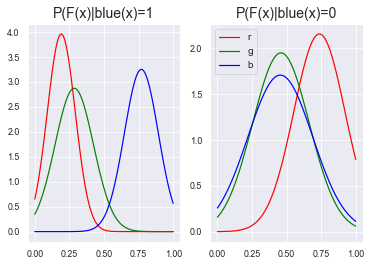

In [29]:
evaluation.plot_colours('bijection', file_modifiers='_default1', colour_thresh=0.5)

In [13]:
a = load_agent('tworules', file_modifiers='_train_negative3')
for name in a.rule_models.keys():
    pm = a.rule_models[name]
    print(name)
    print(pm.rule_belief.belief)

NameError: name 'load_agent' is not defined

In [ ]:
a = load_agent('onerule', file_modifiers='_train_negative3')
for name in a.rule_models.keys():
    pm = a.rule_models[name]
    print(name)
    print(pm.rule_belief.belief)

In [ ]:
a = load_agent('simplecolours', file_modifiers='_train_negative3')
for name in a.rule_models.keys():
    pm = a.rule_models[name]
    print(name)
    print(pm.rule_belief.belief)

In [32]:
a = evaluation.load_agent('tworules', file_modifiers='_default1')
for name in a.rule_models.keys():
    pm = a.rule_models[name]
    print(name)
    print(pm.rule_belief.belief)

('(forall (?x) (or (not (green ?x)) (exists (?y) (and (yellow ?y) (on ?x ?y)))))', '(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))')
[[0.001 0.   ]
 [0.999 0.   ]]
('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))', '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')
[[0.001 0.999]
 [0.    0.   ]]
